In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [177]:
completed=pd.read_excel("/Users/aayushjain/codes/projects/company assignements/Snape/Airport Demand/Completed Ride Details.xlsx")
incompleted=pd.read_csv("/Users/aayushjain/codes/projects/company assignements/Snape/Airport Demand/Incomplete Ride Details (Historical) - May 1, 2024 - May 20, 2024.csv")

WARNING - (py.warnings._showwarnmsg) - /var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_75017/375524548.py:2: DtypeWarning:

Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.




In [178]:
completed_copy=completed

In [179]:
incompleted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145731 entries, 0 to 145730
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   user_id                  145731 non-null  int64 
 1   user_phone_no            145731 non-null  object
 2   ride_id                  145731 non-null  object
 3   driver_id                145731 non-null  object
 4   name                     145731 non-null  object
 5   driver_phone_no          145731 non-null  object
 6   session_id               145731 non-null  int64 
 7   city_name                145731 non-null  object
 8   request_made_at          145731 non-null  object
 9   pickup_lat_long          145731 non-null  object
 10  pickup_location_address  145731 non-null  object
 11  status                   145731 non-null  object
dtypes: int64(2), object(10)
memory usage: 13.3+ MB


In [180]:
completed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80732 entries, 0 to 80731
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   request_made_at         80732 non-null  datetime64[ns]
 1   request_accepted_at     80732 non-null  datetime64[ns]
 2   pickup_time             80732 non-null  datetime64[ns]
 3   ride_end_at             80732 non-null  datetime64[ns]
 4   user_id                 80732 non-null  int64         
 5   ride_id                 80732 non-null  int64         
 6   user_name               80732 non-null  object        
 7   user_phone_no           80732 non-null  int64         
 8   driver_id               80732 non-null  int64         
 9   last_login              80732 non-null  datetime64[ns]
 10  vehicle_no              80732 non-null  object        
 11  city_name               80732 non-null  object        
 12  driver_name             80732 non-null  object

Airport pickup acceptance rate and count. Pattern.

Airport drop - count. Pattern.

In [181]:
completed_data=completed[['request_made_at','user_id','driver_id','user_name','pickup_lat_long','user_fare']]
incompleted_data=incompleted[['user_id','driver_id','name','request_made_at','pickup_lat_long', 'status']]

In [182]:
combined_data = pd.concat([incompleted_data, completed_data], ignore_index=True)


In [183]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226463 entries, 0 to 226462
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   user_id          226463 non-null  int64  
 1   driver_id        226463 non-null  object 
 2   name             145731 non-null  object 
 3   request_made_at  226463 non-null  object 
 4   pickup_lat_long  226463 non-null  object 
 5   status           145731 non-null  object 
 6   user_name        80732 non-null   object 
 7   user_fare        80732 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 13.8+ MB


In [184]:
combined_data['date_column']=pd.to_datetime(combined_data['request_made_at'])

In [185]:
import pandas as pd

combined_data['date_column'] = pd.to_datetime(combined_data['date_column'])

combined_data['10min_window'] = combined_data['date_column'].dt.floor('10min')

deduped_data = combined_data.sort_values(['user_id', 'date_column']).drop_duplicates(['user_id', '10min_window'], keep='first')

dropped_rows = len(combined_data) - len(deduped_data)

print(f"Number of rows dropped: {dropped_rows}")
print(deduped_data)

Number of rows dropped: 39374
         user_id driver_id             name      request_made_at  \
152372  13117245  13117245              NaN  2024-05-09 13:02:53   
98533   13117245  15260933    Chandan Kumar  2024-05-13 15:44:02   
70225   13117245  13117245  Mostakin Sahaji  2024-05-19 14:44:43   
182702  13119853  15219202              NaN  2024-05-01 15:58:04   
179191  13119853  14285356              NaN  2024-05-02 14:11:41   
...          ...       ...              ...                  ...   
184971  15726066  15201187              NaN  2024-05-20 23:32:20   
184966  15726075  15226318              NaN  2024-05-20 23:36:38   
184963  15726090  15239701              NaN  2024-05-20 23:42:28   
184960  15726102  14790178              NaN  2024-05-20 23:47:34   
184953  15726130  14835456              NaN  2024-05-20 23:57:04   

            pickup_lat_long             status        user_name  user_fare  \
152372  22.578590,88.472075                NaN  Mostakin Sahaji     1094.0 

In [186]:
combined_data=deduped_data

In [187]:
from haversine import haversine, Unit
combined_data[['latitude', 'longitude']] = combined_data['pickup_lat_long'].str.split(',', expand=True)
combined_data['latitude'] = combined_data['latitude'].astype(float)
combined_data['longitude'] = combined_data['longitude'].astype(float)

airport=(22.642434, 88.439351)

def calculate_distance(coords,lat, lon):
    point_coords = (lat, lon)
    return haversine(coords, point_coords, unit=Unit.KILOMETERS)
combined_data['aerial_dist_airport'] = combined_data.apply(
    lambda row: calculate_distance(airport,row['latitude'], row['longitude']), axis=1
)

In [188]:
airport_data=combined_data[combined_data['aerial_dist_airport']<2]

In [189]:
airport_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15344 entries, 174901 to 184953
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              15344 non-null  int64         
 1   driver_id            15344 non-null  object        
 2   name                 5615 non-null   object        
 3   request_made_at      15344 non-null  object        
 4   pickup_lat_long      15344 non-null  object        
 5   status               5615 non-null   object        
 6   user_name            9729 non-null   object        
 7   user_fare            9729 non-null   float64       
 8   date_column          15344 non-null  datetime64[ns]
 9   10min_window         15344 non-null  datetime64[ns]
 10  latitude             15344 non-null  float64       
 11  longitude            15344 non-null  float64       
 12  aerial_dist_airport  15344 non-null  float64       
dtypes: datetime64[ns](2), float64(

In [190]:
9729/15344

0.6340589155370178

completion rate of 64%

In [191]:
airport_data['user_fare'].describe()

count    9729.000000
mean      455.036900
std       217.294678
min       140.000000
25%       297.000000
50%       420.000000
75%       570.000000
max      4688.000000
Name: user_fare, dtype: float64

400-450 mean. 

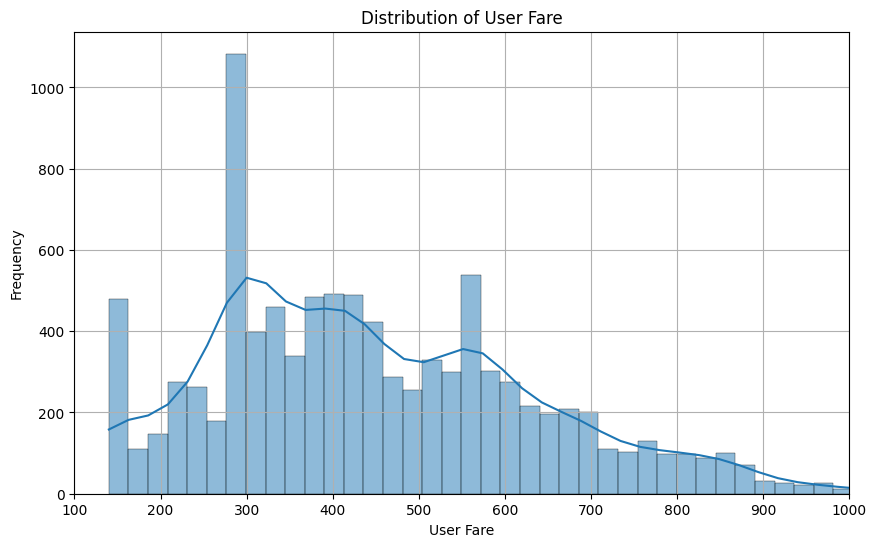

In [192]:
user_fare_data = airport_data['user_fare']
import seaborn as sns
# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(user_fare_data, bins=200, kde=True)
plt.title('Distribution of User Fare')
plt.xlabel('User Fare')
plt.ylabel('Frequency')
plt.xlim(100,1000)
plt.grid(True)
plt.show()


In [193]:
from haversine import haversine, Unit
completed[['latitude', 'longitude']] = completed['pickup_lat_long'].str.split(',', expand=True)
completed['latitude'] = completed['latitude'].astype(float)
completed['longitude'] = completed['longitude'].astype(float)

airport=(22.642434, 88.439351)

def calculate_distance(coords,lat, lon):
    point_coords = (lat, lon)
    return haversine(coords, point_coords, unit=Unit.KILOMETERS)
completed['aerial_dist_airport'] = completed.apply(
    lambda row: calculate_distance(airport,row['latitude'], row['longitude']), axis=1
)

In [194]:
airport_data_completed=completed[completed['aerial_dist_airport']<2]

In [195]:
airport_data_completed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10460 entries, 1 to 80731
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   request_made_at         10460 non-null  datetime64[ns]
 1   request_accepted_at     10460 non-null  datetime64[ns]
 2   pickup_time             10460 non-null  datetime64[ns]
 3   ride_end_at             10460 non-null  datetime64[ns]
 4   user_id                 10460 non-null  int64         
 5   ride_id                 10460 non-null  int64         
 6   user_name               10460 non-null  object        
 7   user_phone_no           10460 non-null  int64         
 8   driver_id               10460 non-null  int64         
 9   last_login              10460 non-null  datetime64[ns]
 10  vehicle_no              10460 non-null  object        
 11  city_name               10460 non-null  object        
 12  driver_name             10460 non-null  object     

In [196]:
airport_data_completed['wait_time']=airport_data_completed['pickup_time']-airport_data_completed['request_accepted_at']

WARNING - (py.warnings._showwarnmsg) - /var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_75017/2849177883.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




In [197]:
airport_data_completed['wait_time']

1       0 days 00:11:51
3       0 days 00:09:29
4       0 days 00:05:21
7       0 days 00:10:27
8       0 days 00:04:10
              ...      
80725   0 days 00:07:30
80726   0 days 00:06:14
80727   0 days 00:18:52
80730   0 days 00:10:08
80731   0 days 00:14:32
Name: wait_time, Length: 10460, dtype: timedelta64[ns]

In [198]:
airport_data_completed['wait_time_minutes'] = airport_data_completed['wait_time'].dt.total_seconds() / 60


WARNING - (py.warnings._showwarnmsg) - /var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_75017/4205213986.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




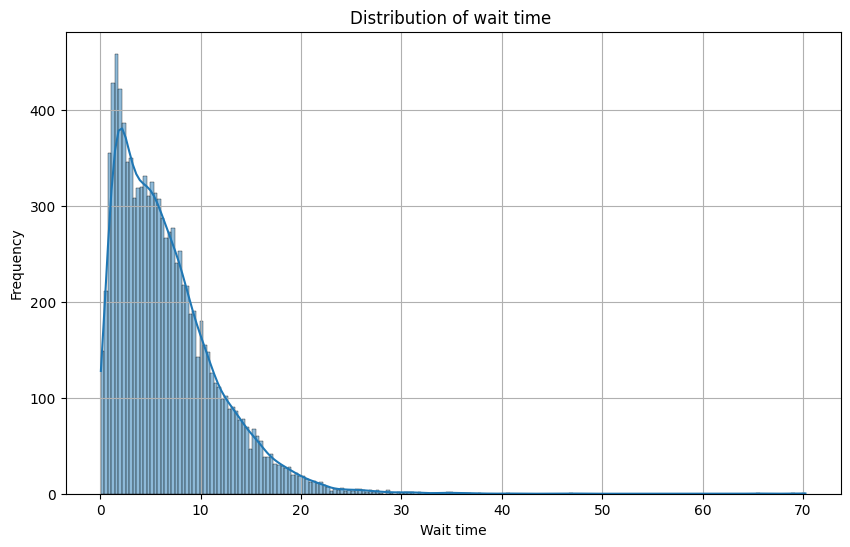

In [199]:
user_fare_data = airport_data_completed['wait_time_minutes']
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(user_fare_data, bins=200, kde=True)
plt.title('Distribution of wait time ')
plt.xlabel('Wait time')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [200]:
airport_data_completed['wait_time_minutes'].describe()

count    10460.000000
mean         6.626708
std          5.085679
min          0.066667
25%          2.733333
50%          5.533333
75%          9.150000
max         70.233333
Name: wait_time_minutes, dtype: float64

In [201]:
airport_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15344 entries, 174901 to 184953
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              15344 non-null  int64         
 1   driver_id            15344 non-null  object        
 2   name                 5615 non-null   object        
 3   request_made_at      15344 non-null  object        
 4   pickup_lat_long      15344 non-null  object        
 5   status               5615 non-null   object        
 6   user_name            9729 non-null   object        
 7   user_fare            9729 non-null   float64       
 8   date_column          15344 non-null  datetime64[ns]
 9   10min_window         15344 non-null  datetime64[ns]
 10  latitude             15344 non-null  float64       
 11  longitude            15344 non-null  float64       
 12  aerial_dist_airport  15344 non-null  float64       
dtypes: datetime64[ns](2), float64(

In [202]:
airport_data['status'] = airport_data['status'].fillna('completed')


WARNING - (py.warnings._showwarnmsg) - /var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_75017/250652515.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




In [203]:
airport_data['hour_of_day'] = airport_data['date_column'].dt.hour


WARNING - (py.warnings._showwarnmsg) - /var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_75017/542071188.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




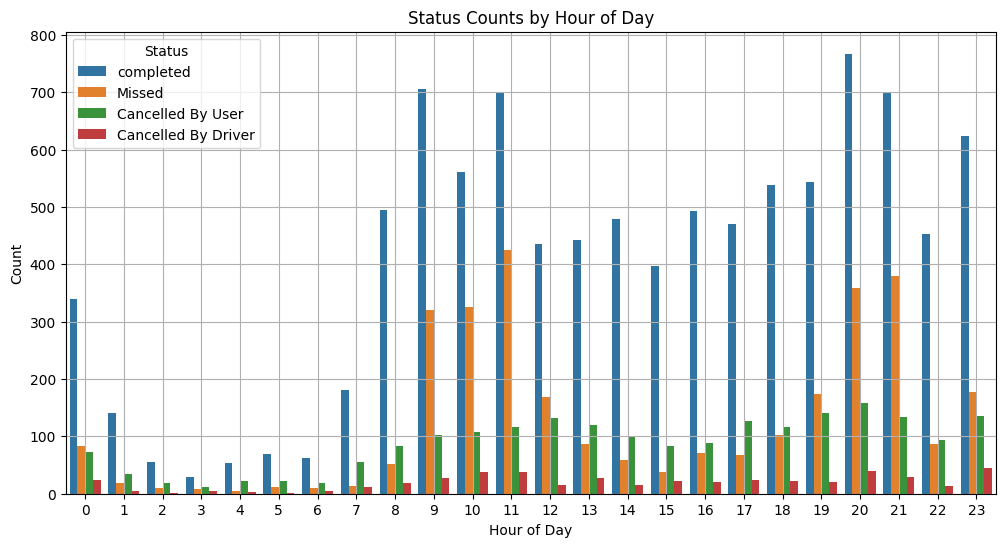

In [204]:
plt.figure(figsize=(12, 6))
sns.countplot(data=airport_data, x='hour_of_day', hue='status')
plt.title('Status Counts by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.legend(title='Status')
plt.grid(True)
plt.show()

In [205]:
airport_data['day_of_week'] = airport_data['date_column'].dt.day_name()


WARNING - (py.warnings._showwarnmsg) - /var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_75017/704612745.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




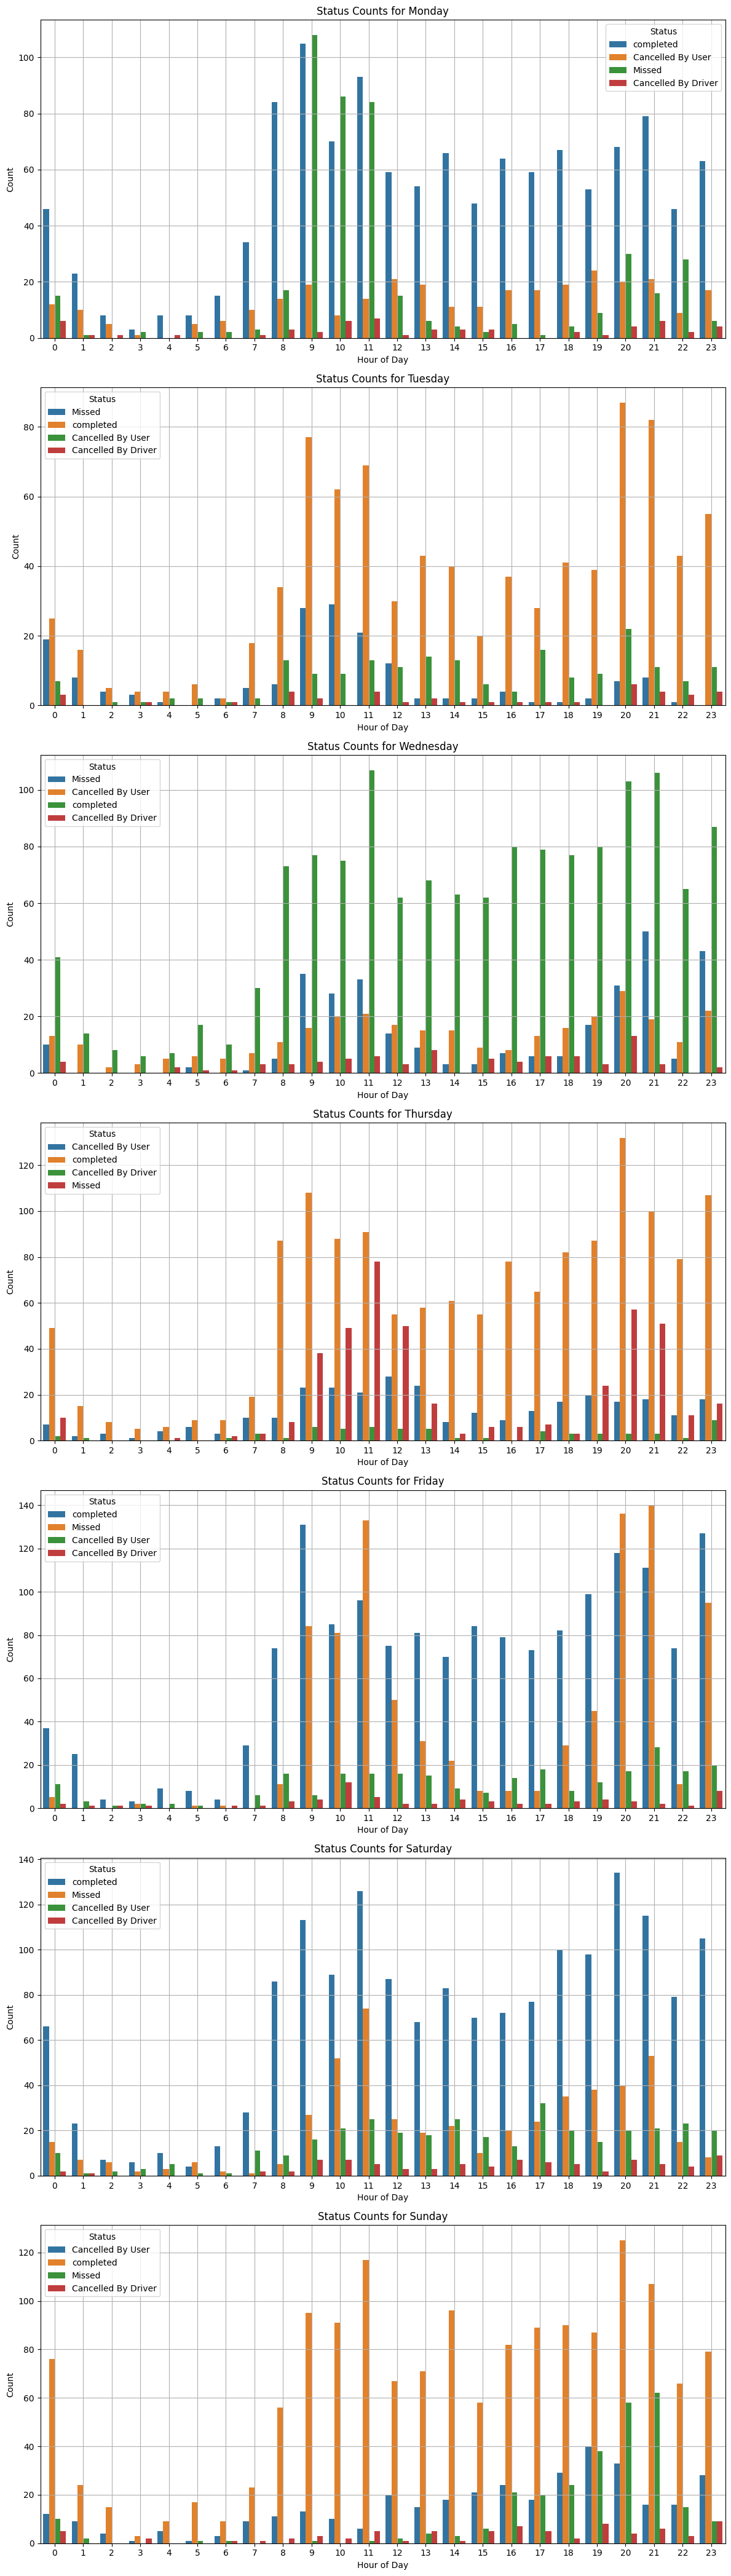

In [206]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named airport_data and has a 'day_of_week' column
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Set up subplots
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(12, 6*7))

# Loop through each day and create count plot
for i, day in enumerate(days_of_week):
    ax = axes[i]
    sns.countplot(data=airport_data[airport_data['day_of_week'] == day], x='hour_of_day', hue='status', ax=ax)
    ax.set_title(f'Status Counts for {day}')
    ax.set_xlabel('Hour of Day')
    ax.set_ylabel('Count')
    ax.legend(title='Status')
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


In [207]:
airport_data.groupby('day_of_week').size()

day_of_week
Friday       2807
Monday       2036
Saturday     2602
Sunday       2269
Thursday     2263
Tuesday      1267
Wednesday    2100
dtype: int64

In [208]:
status_ratio = airport_data.groupby('hour_of_day')['status'].apply(lambda x: (x == 'completed').sum() / len(x)).reset_index()
status_ratio.rename(columns={'status': 'completion_ratio'}, inplace=True)

print(status_ratio)

    hour_of_day  completion_ratio
0             0          0.653846
1             1          0.710660
2             2          0.647059
3             3          0.545455
4             4          0.630952
5             5          0.663462
6             6          0.645833
7             7          0.696154
8             8          0.762346
9             9          0.610199
10           10          0.544218
11           11          0.547377
12           12          0.579228
13           13          0.653392
14           14          0.734663
15           15          0.736549
16           16          0.731055
17           17          0.683140
18           18          0.691026
19           19          0.619156
20           20          0.579305
21           21          0.563154
22           22          0.699690
23           23          0.635066


In [209]:
airport_data_completed['distance_covered'].describe()

count    10460.000000
mean        13.031843
std          7.721582
min          0.000000
25%          7.390750
50%         11.751000
75%         17.149250
max        165.415000
Name: distance_covered, dtype: float64

In [211]:
airport_data_completed[['latitude_drop', 'longitude_drop']] = airport_data_completed['drop_lat_long'].str.split(',', expand=True)


WARNING - (py.warnings._showwarnmsg) - /var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_75017/4055506258.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


WARNING - (py.warnings._showwarnmsg) - /var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_75017/4055506258.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




In [212]:
airport_data_completed['longitude_drop']

1        88.334504
3        88.406948
4        88.379743
7        88.399123
8        88.454779
           ...    
80725    88.470401
80726    88.438371
80727    88.354698
80730    88.398209
80731    88.343674
Name: longitude_drop, Length: 10460, dtype: object

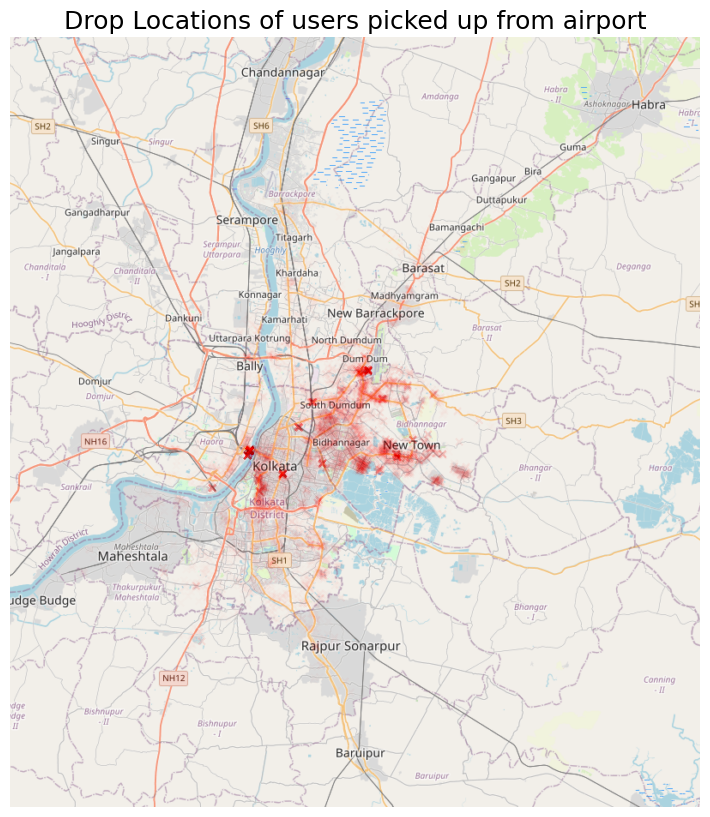

In [213]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
gactive_users_coordinates = gpd.GeoDataFrame(
        airport_data_completed,
        geometry=gpd.points_from_xy(airport_data_completed.longitude_drop, airport_data_completed.latitude_drop)
    )

    # Ensure geometry is set correctly
gdf = gpd.GeoDataFrame(
        gactive_users_coordinates,
        geometry=gpd.points_from_xy(gactive_users_coordinates.longitude_drop, gactive_users_coordinates.latitude_drop)
    )

    # Plot the points with a marker
ax = gplt.webmap(gdf, projection=gcrs.WebMercator(), figsize=(10, 10))

gplt.pointplot(
        gdf, 
        ax=ax, 
        s=5,  # size of the points
        color='red',  # color of the points
        marker='x',  # shape of the points
        alpha=0.01  # transparency of the points
    )

plt.title(f'Drop Locations of users picked up from airport', fontsize=18)
plt.show()


WARNING - (py.warnings._showwarnmsg) - /Users/aayushjain/Library/Python/3.9/lib/python/site-packages/geoplot/geoplot.py:1304: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.





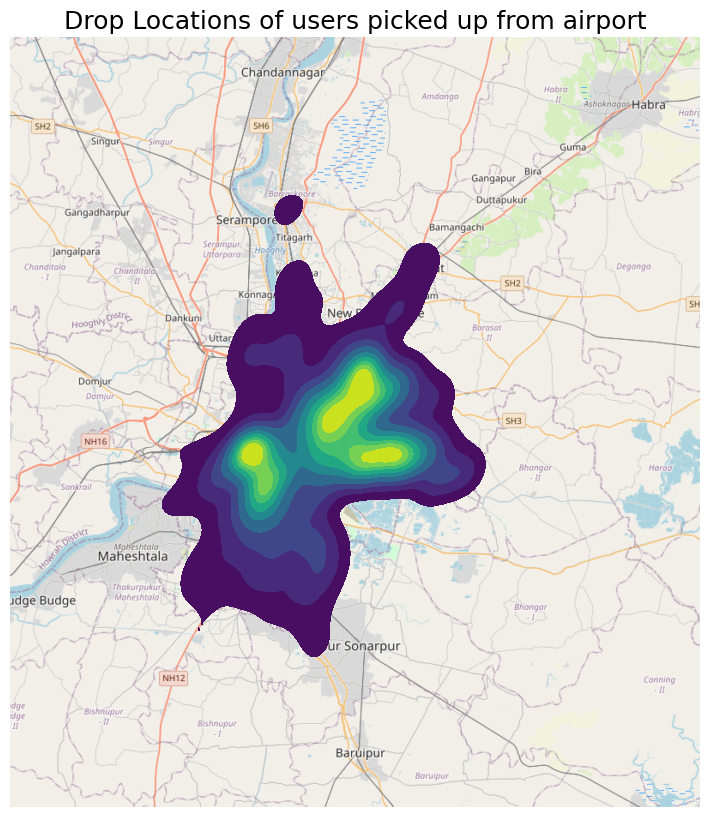

In [214]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
gactive_users_coordinates = gpd.GeoDataFrame(
        airport_data_completed,
        geometry=gpd.points_from_xy(airport_data_completed.longitude_drop, airport_data_completed.latitude_drop)
    )

    # Ensure geometry is set correctly
gdf = gpd.GeoDataFrame(
        gactive_users_coordinates,
        geometry=gpd.points_from_xy(gactive_users_coordinates.longitude_drop, gactive_users_coordinates.latitude_drop)
    )

    # Plot the points with a marker
ax = gplt.webmap(gdf, projection=gcrs.WebMercator(), figsize=(10, 10))

gplt.kdeplot(
    gdf,
    ax=ax,
    cmap='viridis',  # colormap for the heatmap
    shade=True,      # shade the areas of high density
)

plt.title(f'Drop Locations of users picked up from airport', fontsize=18)
plt.show()


In [215]:
airport_data['date'] = airport_data['date_column'].dt.date


WARNING - (py.warnings._showwarnmsg) - /var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_75017/4235388984.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




In [216]:
airport_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15344 entries, 174901 to 184953
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              15344 non-null  int64         
 1   driver_id            15344 non-null  object        
 2   name                 5615 non-null   object        
 3   request_made_at      15344 non-null  object        
 4   pickup_lat_long      15344 non-null  object        
 5   status               15344 non-null  object        
 6   user_name            9729 non-null   object        
 7   user_fare            9729 non-null   float64       
 8   date_column          15344 non-null  datetime64[ns]
 9   10min_window         15344 non-null  datetime64[ns]
 10  latitude             15344 non-null  float64       
 11  longitude            15344 non-null  float64       
 12  aerial_dist_airport  15344 non-null  float64       
 13  hour_of_day          15344 non

In [217]:
hourly_demand_airport = airport_data.groupby(['date', 'hour_of_day']).size().reset_index(name='y')


In [218]:
hourly_demand_airport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         479 non-null    object
 1   hour_of_day  479 non-null    int32 
 2   y            479 non-null    int64 
dtypes: int32(1), int64(1), object(1)
memory usage: 9.5+ KB


In [219]:
from datetime import datetime, timedelta
hourly_demand_airport['ds'] = hourly_demand_airport.apply(lambda row: datetime.combine(row['date'], datetime.min.time()) + timedelta(hours=row['hour_of_day']), axis=1)

hourly_demand_airport = hourly_demand_airport.drop(columns=['date', 'hour_of_day'])

hourly_demand_airport['ds'] = pd.to_datetime(hourly_demand_airport['ds'])

print("Hourly Demand Data:")
print(hourly_demand_airport.head())
print(hourly_demand_airport.info())

Hourly Demand Data:
    y                  ds
0  25 2024-05-01 00:00:00
1   9 2024-05-01 01:00:00
2   2 2024-05-01 02:00:00
3   2 2024-05-01 03:00:00
4   5 2024-05-01 04:00:00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   y       479 non-null    int64         
 1   ds      479 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 7.6 KB
None


In [220]:
hourly_demand_airport

,y,ds
0,25,2024-05-01 00:00:00
1,9,2024-05-01 01:00:00
2,2,2024-05-01 02:00:00
3,2,2024-05-01 03:00:00
4,5,2024-05-01 04:00:00
...,...,...
474,27,2024-05-20 19:00:00
475,34,2024-05-20 20:00:00
476,43,2024-05-20 21:00:00
477,13,2024-05-20 22:00:00


In [221]:
from neuralprophet import NeuralProphet

model = NeuralProphet()
model.fit(hourly_demand_airport, freq='H')  # Assuming hourly data

# Make predictions
future = model.make_future_dataframe(hourly_demand_airport, periods=24)  # Forecast for the next 24 hours
forecast = model.predict(future)

# Print the forecast
print(forecast)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.582% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 140
WARNING - (py.warnings._showwarnmsg) - /Users/aayushjain/Library/Python/3.9/lib/python/site-packages/pytorch_lightning/trainer/setup.py:201: UserWarning:

MPS available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='mps', devices=1)`.


WARNING - (NP.config.set_lr_finder_args) - L

Epoch 140: 100%|██████████| 140/140 [00:00<00:00, 3508.16it/s, loss=0.0284, v_num=3, MAE=8.020, RMSE=11.00, Loss=0.0284, RegLoss=0.000]  

INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.582% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 95.833% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 95.833% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 387.00it/s]


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


                    ds     y      yhat1      trend  season_weekly  \
0  2024-05-21 00:00:00  None  19.292131  29.908190      -6.731320   
1  2024-05-21 01:00:00  None   5.380040  29.888399      -7.013095   
2  2024-05-21 02:00:00  None  -7.038043  29.868612      -7.277812   
3  2024-05-21 03:00:00  None  -8.187059  29.848824      -7.519347   
4  2024-05-21 04:00:00  None  -3.297192  29.829035      -7.713203   
5  2024-05-21 05:00:00  None  -4.510247  29.809248      -7.877991   
6  2024-05-21 06:00:00  None  -6.730167  29.789461      -8.000830   
7  2024-05-21 07:00:00  None   2.806375  29.769674      -8.091115   
8  2024-05-21 08:00:00  None  25.387409  29.749884      -8.146446   
9  2024-05-21 09:00:00  None  43.452732  29.730095      -8.163005   
10 2024-05-21 10:00:00  None  48.812786  29.710308      -8.145078   
11 2024-05-21 11:00:00  None  43.767700  29.690519      -8.091499   
12 2024-05-21 12:00:00  None  33.173702  29.670732      -8.000031   
13 2024-05-21 13:00:00  None  22.4

In [222]:
predicted = model.predict(hourly_demand_airport)
forecast = model.predict(hourly_demand_airport)
model.plot(forecast)


INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.582% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.582% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 364.60it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.582% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.582% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 448.44it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
ERROR - (NP.plotly.plot) - plotly-resampler is not installed. Please install it to use the resampler.


In [223]:
model.plot_parameters()


ERROR - (NP.plotly.plot_parameters) - plotly-resampler is not installed. Please install it to use the resampler.


In [224]:
model.plot_components(forecast)


ERROR - (NP.plotly.plot_components) - plotly-resampler is not installed. Please install it to use the resampler.


In [225]:
df_future = model.make_future_dataframe(hourly_demand_airport, periods=24*7, n_historic_predictions=True)


INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.582% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [226]:
hourly_demand_airport.tail()

,y,ds
474,27,2024-05-20 19:00:00
475,34,2024-05-20 20:00:00
476,43,2024-05-20 21:00:00
477,13,2024-05-20 22:00:00
478,30,2024-05-20 23:00:00


In [227]:
future_dates = model.make_future_dataframe(hourly_demand_airport, periods=24, n_historic_predictions=len(hourly_demand_airport))

# Make predictions
forecast = model.predict(future_dates)

# Print forecast
print(forecast[['ds', 'yhat1']].tail(24))

INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.582% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.602% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.602% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.data.processing._handle_missing_data) - Dropped 24 rows at the end with NaNs in 'y' column.


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 91.13it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column



                     ds      yhat1
479 2024-05-21 00:00:00  19.292131
480 2024-05-21 01:00:00   5.380040
481 2024-05-21 02:00:00  -7.038043
482 2024-05-21 03:00:00  -8.187059
483 2024-05-21 04:00:00  -3.297192
484 2024-05-21 05:00:00  -4.510247
485 2024-05-21 06:00:00  -6.730167
486 2024-05-21 07:00:00   2.806375
487 2024-05-21 08:00:00  25.387409
488 2024-05-21 09:00:00  43.452732
489 2024-05-21 10:00:00  48.812786
490 2024-05-21 11:00:00  43.767700
491 2024-05-21 12:00:00  33.173702
492 2024-05-21 13:00:00  22.460836
493 2024-05-21 14:00:00  18.864452
494 2024-05-21 15:00:00  22.077768
495 2024-05-21 16:00:00  24.298584
496 2024-05-21 17:00:00  23.444183
497 2024-05-21 18:00:00  27.905930
498 2024-05-21 19:00:00  41.455544
499 2024-05-21 20:00:00  52.029648
500 2024-05-21 21:00:00  48.157631
501 2024-05-21 22:00:00  36.088234
502 2024-05-21 23:00:00  28.017065


In [228]:
model.plot(forecast)


ERROR - (NP.plotly.plot) - plotly-resampler is not installed. Please install it to use the resampler.


In [229]:
airport_data_completed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10460 entries, 1 to 80731
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   request_made_at         10460 non-null  datetime64[ns] 
 1   request_accepted_at     10460 non-null  datetime64[ns] 
 2   pickup_time             10460 non-null  datetime64[ns] 
 3   ride_end_at             10460 non-null  datetime64[ns] 
 4   user_id                 10460 non-null  int64          
 5   ride_id                 10460 non-null  int64          
 6   user_name               10460 non-null  object         
 7   user_phone_no           10460 non-null  int64          
 8   driver_id               10460 non-null  int64          
 9   last_login              10460 non-null  datetime64[ns] 
 10  vehicle_no              10460 non-null  object         
 11  city_name               10460 non-null  object         
 12  driver_name             10460 non-nul

In [230]:
completed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80732 entries, 0 to 80731
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   request_made_at         80732 non-null  datetime64[ns]
 1   request_accepted_at     80732 non-null  datetime64[ns]
 2   pickup_time             80732 non-null  datetime64[ns]
 3   ride_end_at             80732 non-null  datetime64[ns]
 4   user_id                 80732 non-null  int64         
 5   ride_id                 80732 non-null  int64         
 6   user_name               80732 non-null  object        
 7   user_phone_no           80732 non-null  int64         
 8   driver_id               80732 non-null  int64         
 9   last_login              80732 non-null  datetime64[ns]
 10  vehicle_no              80732 non-null  object        
 11  city_name               80732 non-null  object        
 12  driver_name             80732 non-null  object

In [231]:
completed[['latitude_drop', 'longitude_drop']] = completed['drop_lat_long'].str.split(',', expand=True)
completed['latitude_drop'] = completed['latitude_drop'].astype(float)
completed['longitude_drop'] = completed['longitude_drop'].astype(float)
airport=(22.642434, 88.439351)

def calculate_distance(coords,lat, lon):
    point_coords = (lat, lon)
    return haversine(coords, point_coords, unit=Unit.KILOMETERS)
completed['aerial_dist_drop_airport'] = completed.apply(
    lambda row: calculate_distance(airport,row['latitude_drop'], row['longitude_drop']), axis=1
)

In [232]:
to_airport=completed[completed['aerial_dist_drop_airport']<2]

In [233]:
to_airport.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5770 entries, 32 to 80720
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   request_made_at           5770 non-null   datetime64[ns]
 1   request_accepted_at       5770 non-null   datetime64[ns]
 2   pickup_time               5770 non-null   datetime64[ns]
 3   ride_end_at               5770 non-null   datetime64[ns]
 4   user_id                   5770 non-null   int64         
 5   ride_id                   5770 non-null   int64         
 6   user_name                 5770 non-null   object        
 7   user_phone_no             5770 non-null   int64         
 8   driver_id                 5770 non-null   int64         
 9   last_login                5770 non-null   datetime64[ns]
 10  vehicle_no                5770 non-null   object        
 11  city_name                 5770 non-null   object        
 12  driver_name            

In [234]:
to_airport['user_fare'].describe()

count    5770.000000
mean      304.422357
std       169.585511
min       140.000000
25%       201.000000
50%       280.000000
75%       366.000000
max      2771.000000
Name: user_fare, dtype: float64

count    9729.000000
mean      455.036900
std       217.294678
min       140.000000
25%       297.000000
50%       420.000000
75%       570.000000
max      4688.000000

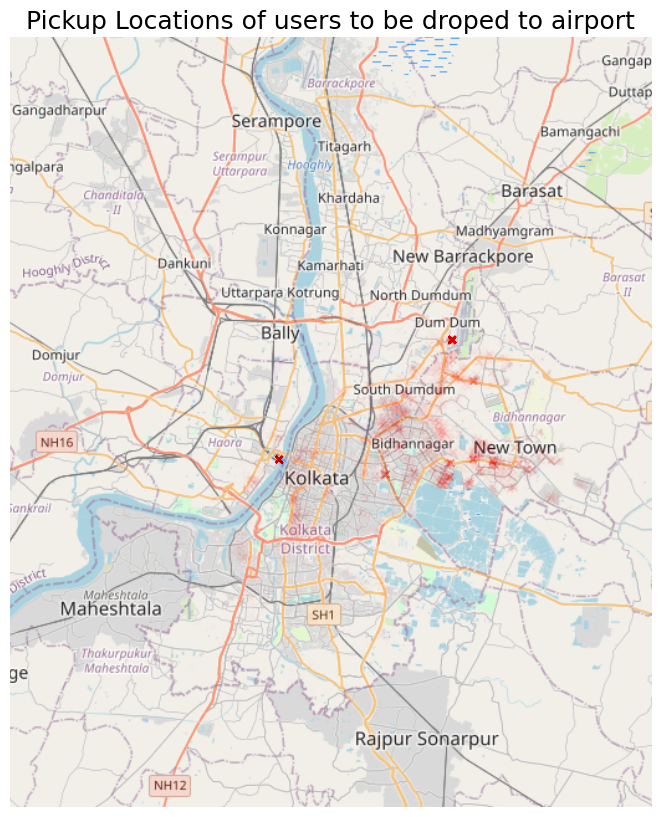

In [235]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
gactive_users_coordinates = gpd.GeoDataFrame(
        to_airport,
        geometry=gpd.points_from_xy(to_airport.longitude, to_airport.latitude)
    )

    # Ensure geometry is set correctly
gdf = gpd.GeoDataFrame(
        gactive_users_coordinates,
        geometry=gpd.points_from_xy(gactive_users_coordinates.longitude, gactive_users_coordinates.latitude)
    )

    # Plot the points with a marker
ax = gplt.webmap(gdf, projection=gcrs.WebMercator(), figsize=(10, 10))

gplt.pointplot(
        gdf, 
        ax=ax, 
        s=5,  # size of the points
        color='red',  # color of the points
        marker='x',  # shape of the points
        alpha=0.01  # transparency of the points
    )

plt.title(f'Pickup Locations of users to be droped to airport', fontsize=18)
plt.show()


In [236]:
completed['pickup_time']

0       2024-05-11 00:09:26
1       2024-05-11 00:11:36
2       2024-05-11 00:11:28
3       2024-05-11 00:08:30
4       2024-05-11 00:01:52
                ...        
80727   2024-05-11 00:22:03
80728   2024-05-11 00:16:50
80729   2024-05-11 00:10:39
80730   2024-05-11 00:12:15
80731   2024-05-11 00:14:46
Name: pickup_time, Length: 80732, dtype: datetime64[ns]

In [237]:
completed['pickup_time'] = pd.to_datetime(completed['pickup_time'])

# Specify the target date
target_date = datetime(2024, 5, 19)

# Filter the completed to get rows for the target date
target_completed = completed[completed['pickup_time'].dt.date == target_date.date()]

In [238]:
target_completed[target_completed['aerial_dist_airport']<2]

,request_made_at,request_accepted_at,pickup_time,ride_end_at,user_id,ride_id,user_name,user_phone_no,driver_id,last_login,...,tip_amount,additional_cut,discount,cancellation_charges,latitude,longitude,aerial_dist_airport,latitude_drop,longitude_drop,aerial_dist_drop_airport
42925,2024-05-19 23:59:16,2024-05-19 23:59:18,2024-05-19 23:59:27,2024-05-20 00:01:27,15302648,503157567,Om Raj,916290909437,13994739,2024-05-19 14:40:08,...,0,0,0,0,22.635162,88.434568,0.945940,22.628481,88.433975,1.646689
42937,2024-05-19 23:54:51,2024-05-19 23:54:58,2024-05-19 23:56:17,2024-05-20 00:04:17,14299049,503156971,Udayan Bose,919678082424,15292023,2024-05-21 12:20:27,...,0,0,0,0,22.643104,88.438658,0.102996,22.627050,88.444588,1.793075
42941,2024-05-19 23:51:29,2024-05-19 23:51:31,2024-05-19 23:53:07,2024-05-20 00:21:07,14169595,503156640,Abhishek Singh,918238436399,14196714,2024-05-20 19:41:12,...,0,0,0,0,22.642833,88.438624,0.086803,22.590515,88.456348,6.030994
42942,2024-05-19 23:51:23,2024-05-19 23:51:26,2024-05-19 23:51:45,2024-05-20 00:16:45,14423840,503156607,Dinesh Yadav,918240502017,15067016,2024-05-21 02:10:47,...,0,0,0,0,22.641253,88.432895,0.675437,22.619887,88.351437,9.364733
42943,2024-05-19 23:50:59,2024-05-19 23:51:01,2024-05-19 23:54:14,2024-05-20 00:25:14,15262820,503156524,Ashoke Guha,919874149080,14298202,2024-05-20 17:00:38,...,0,0,0,0,22.643065,88.438708,0.096319,22.602175,88.371499,8.278989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47315,2024-05-18 23:59:01,2024-05-18 23:59:02,2024-05-19 00:07:10,2024-05-19 00:47:10,15716501,502907180,S DAS,918337086126,14107191,2024-05-20 23:32:54,...,0,0,0,0,22.643048,88.438612,0.102044,22.523274,88.368929,15.094304
47319,2024-05-18 23:57:42,2024-05-18 23:57:43,2024-05-19 00:02:06,2024-05-19 00:39:06,15716462,502906957,Atanu Dey,918240060221,14614298,2024-05-21 09:48:08,...,0,0,0,0,22.642432,88.437673,0.172204,22.557603,88.407899,9.970073
47320,2024-05-18 23:57:27,2024-05-18 23:57:28,2024-05-19 00:02:14,2024-05-19 00:17:14,13231735,502906886,Debanjan Bose,919830410004,15122733,2024-05-20 21:18:52,...,0,0,0,0,22.643049,88.438795,0.089063,22.614476,88.384418,6.438346
47321,2024-05-18 23:55:18,2024-05-18 23:55:19,2024-05-19 00:03:36,2024-05-19 00:16:36,15716491,502906580,KK SARKAR,916297808977,13148205,2024-05-20 18:14:07,...,0,0,0,0,22.643104,88.438859,0.089998,22.619884,88.392868,5.389514


In [239]:
target_completed[target_completed['aerial_dist_drop_airport']<2]

,request_made_at,request_accepted_at,pickup_time,ride_end_at,user_id,ride_id,user_name,user_phone_no,driver_id,last_login,...,tip_amount,additional_cut,discount,cancellation_charges,latitude,longitude,aerial_dist_airport,latitude_drop,longitude_drop,aerial_dist_drop_airport
42925,2024-05-19 23:59:16,2024-05-19 23:59:18,2024-05-19 23:59:27,2024-05-20 00:01:27,15302648,503157567,Om Raj,916290909437,13994739,2024-05-19 14:40:08,...,0,0,0,0,22.635162,88.434568,0.945940,22.628481,88.433975,1.646689
42937,2024-05-19 23:54:51,2024-05-19 23:54:58,2024-05-19 23:56:17,2024-05-20 00:04:17,14299049,503156971,Udayan Bose,919678082424,15292023,2024-05-21 12:20:27,...,0,0,0,0,22.643104,88.438658,0.102996,22.627050,88.444588,1.793075
42963,2024-05-19 23:37:45,2024-05-19 23:37:47,2024-05-19 23:43:54,2024-05-19 23:56:54,13293598,503155167,Karan Sinha,919654947039,15413663,2024-05-21 11:07:25,...,0,0,0,0,22.643084,88.438734,0.096090,22.653557,88.425152,1.911256
42987,2024-05-19 23:25:12,2024-05-19 23:25:23,2024-05-19 23:31:33,2024-05-19 23:48:33,14180812,503153783,Ritabrata Joardar,918142003477,13556067,2024-05-21 01:03:15,...,0,0,0,0,22.575901,88.468045,7.962917,22.631192,88.437211,1.269202
42988,2024-05-19 23:24:56,2024-05-19 23:24:58,2024-05-19 23:29:30,2024-05-20 00:03:30,13329115,503153757,Suresh Poddar,919830021774,15279743,2024-05-20 18:57:15,...,0,0,0,0,22.582097,88.343097,11.942848,22.627697,88.444703,1.728289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47278,2024-05-19 00:26:08,2024-05-19 00:26:10,2024-05-19 00:27:52,2024-05-19 00:36:52,14920655,502910980,Chandan Chattoraj,917488383138,13556067,2024-05-21 01:03:15,...,0,0,0,0,22.643222,88.438743,0.107568,22.642626,88.422095,1.771020
47283,2024-05-19 00:23:00,2024-05-19 00:23:01,2024-05-19 00:29:07,2024-05-19 00:38:07,14628510,502910565,Shantonob Ghosh,919475552412,15067016,2024-05-21 02:10:47,...,0,0,0,0,22.643064,88.438715,0.095747,22.628976,88.445973,1.643557
47294,2024-05-19 00:11:51,2024-05-19 00:11:57,2024-05-19 00:18:26,2024-05-19 00:41:26,13832582,502909082,Shalvi Gupta,918670233777,15062951,2024-05-21 10:05:40,...,0,0,0,0,22.571561,88.433307,7.905113,22.629118,88.436769,1.504199
47296,2024-05-19 00:09:50,2024-05-19 00:10:00,2024-05-19 00:16:24,2024-05-19 00:46:24,15715213,502908830,Rajveer Dosanjh,919131263225,14656312,2024-05-20 00:55:58,...,0,0,0,0,22.551939,88.353501,13.376434,22.643505,88.436876,0.280528


62k Total Footfall on 19th May, 24. 28k Out/173 flights, 26K In/ 168 flights. Of the 26k In, 560 used SNAPE. Market Share in Airport Pickups- 2.15% 
Drops -  1.15%

Of these, 25 international flights carried 3,887 passengers out of the city while 26 international flights arrived in Kolkata with 3,735 passengers.

DigiYatra - 11k

Relative Price comparison

SNAPE- 408

OLA - 336,426,613 

InDrive- 230, 260 . Excl Parking. 30k Trips 8-10k driver

Uber 509,574,532. 12 trips/car. 6 hr avg uptime

Yatri Sathi - 190/Non Ac, 284/AC. Excl parking. Daily Rides - 16k. special zones (Howrah + Airport)- 25% - 2k. Rides from airport.

In [240]:
target_completed[target_completed['aerial_dist_drop_airport']<2]['user_fare'].sum()

97074

In [241]:
target_completed[target_completed['aerial_dist_drop_airport']<2]['distance_covered'].sum()

3509.2610000000004

In [242]:
97/35

2.7714285714285714

In [243]:
airport_drop=target_completed[target_completed['aerial_dist_drop_airport']<2]

In [244]:
airport_drop[airport_drop['user_fare']>200]

,request_made_at,request_accepted_at,pickup_time,ride_end_at,user_id,ride_id,user_name,user_phone_no,driver_id,last_login,...,tip_amount,additional_cut,discount,cancellation_charges,latitude,longitude,aerial_dist_airport,latitude_drop,longitude_drop,aerial_dist_drop_airport
42925,2024-05-19 23:59:16,2024-05-19 23:59:18,2024-05-19 23:59:27,2024-05-20 00:01:27,15302648,503157567,Om Raj,916290909437,13994739,2024-05-19 14:40:08,...,0,0,0,0,22.635162,88.434568,0.945940,22.628481,88.433975,1.646689
42937,2024-05-19 23:54:51,2024-05-19 23:54:58,2024-05-19 23:56:17,2024-05-20 00:04:17,14299049,503156971,Udayan Bose,919678082424,15292023,2024-05-21 12:20:27,...,0,0,0,0,22.643104,88.438658,0.102996,22.627050,88.444588,1.793075
42963,2024-05-19 23:37:45,2024-05-19 23:37:47,2024-05-19 23:43:54,2024-05-19 23:56:54,13293598,503155167,Karan Sinha,919654947039,15413663,2024-05-21 11:07:25,...,0,0,0,0,22.643084,88.438734,0.096090,22.653557,88.425152,1.911256
42987,2024-05-19 23:25:12,2024-05-19 23:25:23,2024-05-19 23:31:33,2024-05-19 23:48:33,14180812,503153783,Ritabrata Joardar,918142003477,13556067,2024-05-21 01:03:15,...,0,0,0,0,22.575901,88.468045,7.962917,22.631192,88.437211,1.269202
42988,2024-05-19 23:24:56,2024-05-19 23:24:58,2024-05-19 23:29:30,2024-05-20 00:03:30,13329115,503153757,Suresh Poddar,919830021774,15279743,2024-05-20 18:57:15,...,0,0,0,0,22.582097,88.343097,11.942848,22.627697,88.444703,1.728289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47278,2024-05-19 00:26:08,2024-05-19 00:26:10,2024-05-19 00:27:52,2024-05-19 00:36:52,14920655,502910980,Chandan Chattoraj,917488383138,13556067,2024-05-21 01:03:15,...,0,0,0,0,22.643222,88.438743,0.107568,22.642626,88.422095,1.771020
47283,2024-05-19 00:23:00,2024-05-19 00:23:01,2024-05-19 00:29:07,2024-05-19 00:38:07,14628510,502910565,Shantonob Ghosh,919475552412,15067016,2024-05-21 02:10:47,...,0,0,0,0,22.643064,88.438715,0.095747,22.628976,88.445973,1.643557
47294,2024-05-19 00:11:51,2024-05-19 00:11:57,2024-05-19 00:18:26,2024-05-19 00:41:26,13832582,502909082,Shalvi Gupta,918670233777,15062951,2024-05-21 10:05:40,...,0,0,0,0,22.571561,88.433307,7.905113,22.629118,88.436769,1.504199
47296,2024-05-19 00:09:50,2024-05-19 00:10:00,2024-05-19 00:16:24,2024-05-19 00:46:24,15715213,502908830,Rajveer Dosanjh,919131263225,14656312,2024-05-20 00:55:58,...,0,0,0,0,22.551939,88.353501,13.376434,22.643505,88.436876,0.280528


In [245]:
airport_drop[airport_drop['user_fare']>200]['user_fare'].sum()

80793

In [246]:
80793*0.8

64634.4

22.5 Rs/Km.
For 200 Above - scheduling. 23.5 Km blended.

Factors - Low Drop off rate. Installing app when arriving isnt feasible.

In [247]:
airport_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15344 entries, 174901 to 184953
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              15344 non-null  int64         
 1   driver_id            15344 non-null  object        
 2   name                 5615 non-null   object        
 3   request_made_at      15344 non-null  object        
 4   pickup_lat_long      15344 non-null  object        
 5   status               15344 non-null  object        
 6   user_name            9729 non-null   object        
 7   user_fare            9729 non-null   float64       
 8   date_column          15344 non-null  datetime64[ns]
 9   10min_window         15344 non-null  datetime64[ns]
 10  latitude             15344 non-null  float64       
 11  longitude            15344 non-null  float64       
 12  aerial_dist_airport  15344 non-null  float64       
 13  hour_of_day          15344 non

In [248]:
completed[['user_fare','distance_covered']].sum()

user_fare           2.264200e+07
distance_covered    8.072483e+05
dtype: float64

In [249]:
2.264200e+07/8.072483e+05

28.048371238440513

In [250]:
airport_data_completed['user_fare'].sum()/airport_data_completed['distance_covered'].sum()

34.770420704173674

In [251]:
to_airport['user_fare'].sum()/to_airport['distance_covered'].sum()

27.326140262592567

In [252]:
(22 + 34)/2
23.5

23.5

In [253]:
completed['user_id'].nunique()

39191

In [254]:
users_been_to_airport=airport_data_completed['user_id'].unique()

21-22% from airport.

In [255]:
import pandas as pd

# Assuming you have a DataFrame named 'completed' with a column containing user IDs
# Replace 'user_id_column' with the actual name of your user ID column
user_id_column = 'user_id'

# Create a DataFrame containing the provided user IDs
user_ids = pd.Series(users_been_to_airport)  # Replace '...' with the rest of the user IDs
user_ids_df = pd.DataFrame({user_id_column: user_ids})

# Count the occurrences of each user ID in the main DataFrame
user_id_counts = completed[user_id_column].value_counts()

# Filter the counts for the provided user IDs
counts_for_provided_user_ids = user_id_counts[user_ids]

print(counts_for_provided_user_ids)


user_id
15663943    1
13263024    1
14259523    1
14325592    2
15024566    1
           ..
14608449    1
13257373    1
15671323    1
15083733    1
15671307    1
Name: count, Length: 8627, dtype: int64


In [256]:
counts_for_provided_user_ids.to_excel("counts_for_provided_user_ids.xlsx",index=True)

In [257]:

rows_with_count_1 = counts_for_provided_user_ids[counts_for_provided_user_ids == 1]

num_rows_with_count_1 = len(rows_with_count_1)

print("Number of rows with count 1:", num_rows_with_count_1)


Number of rows with count 1: 5780


In [258]:
completed[completed['user_id']==13119895]

,request_made_at,request_accepted_at,pickup_time,ride_end_at,user_id,ride_id,user_name,user_phone_no,driver_id,last_login,...,tip_amount,additional_cut,discount,cancellation_charges,latitude,longitude,aerial_dist_airport,latitude_drop,longitude_drop,aerial_dist_drop_airport
14380,2024-05-07 11:49:13,2024-05-07 11:49:22,2024-05-07 11:52:01,2024-05-07 12:34:01,13119895,499750872,Rounak,917003999454,15554661,2024-05-19 22:44:00,...,0,0,0,0,22.568732,88.433846,8.214760,22.644876,88.428111,1.185022
29170,2024-05-03 15:26:16,2024-05-03 15:27:34,2024-05-03 15:34:21,2024-05-03 16:00:21,13119895,498550620,Rounak,917003999454,15436658,2024-05-19 18:53:04,...,0,0,0,0,22.645017,88.427837,1.216017,22.577590,88.401337,8.198492


In [259]:
completed[completed['user_id']==13119895]['pickup_address'].to_excel("why.xlsx")

In [261]:
airport_data_completed[airport_data_completed['aerial_dist_airport']>0.5]['user_fare'].describe()

count    2441.000000
mean      274.040557
std       176.751422
min       140.000000
25%       181.000000
50%       239.000000
75%       335.000000
max      4688.000000
Name: user_fare, dtype: float64

In [262]:
completed[completed['user_fare']==4688.000000]

,request_made_at,request_accepted_at,pickup_time,ride_end_at,user_id,ride_id,user_name,user_phone_no,driver_id,last_login,...,tip_amount,additional_cut,discount,cancellation_charges,latitude,longitude,aerial_dist_airport,latitude_drop,longitude_drop,aerial_dist_drop_airport
38409,2024-05-01 10:50:01,2024-05-01 10:50:05,2024-05-01 11:03:11,2024-05-02 00:13:11,15559421,497977629,Aman Shaw,919330785940,13853797,2024-05-20 18:09:45,...,500,0,0,0,22.632021,88.434705,1.252207,22.572451,88.507915,10.492449


seperate toll charges. 
Drop user fare with tip amount.
find aerial dist between pickup and drop
find time for ride. 
pickup time. - add.

In [263]:
completed['user_fare_final']=completed['user_fare']-completed['tip_amount']

In [264]:
completed['tip_amount'].value_counts()

tip_amount
0      79404
10       460
20       318
30       305
50        51
       ...  
850        1
110        1
2          1
280        1
309        1
Name: count, Length: 89, dtype: int64

In [266]:
howrah=(22.583474, 88.342969)
completed['aerial_dist_howrah'] = completed.apply(
    lambda row: calculate_distance(howrah,row['latitude'], row['longitude']), axis=1)


In [267]:
completed.loc[completed['aerial_dist_howrah'] < 0.5, 'user_fare_final'] -= 70


In [268]:
completed.loc[completed['aerial_dist_airport'] < 0.5, 'user_fare_final'] -= 140


In [271]:
completed.loc[completed['user_fare_final'] < 140, 'user_fare_final'] =140

In [273]:
completed[completed['aerial_dist_howrah']<0.5][['user_fare','user_fare_final','distance_covered']].describe()

,user_fare,user_fare_final,distance_covered
count,4376.000000,4376.000000,4376.000000
mean,472.220293,316.246801,12.611154
std,2434.894491,124.637212,5.436208
min,140.000000,140.000000,0.001000
25%,299.000000,228.000000,8.817000
50%,385.000000,314.000000,12.447000
75%,461.250000,390.000000,15.870250
max,100560.000000,2381.000000,53.369000


In [270]:
completed[completed['aerial_dist_airport']<0.5][['user_fare','user_fare_final']].describe()

,user_fare,user_fare_final
count,8019.000000,8019.000000
mean,507.635615,366.159371
std,197.391997,195.472745
min,140.000000,0.000000
25%,361.000000,220.000000
50%,476.000000,335.000000
75%,607.000000,465.000000
max,2771.000000,2631.000000


In [ ]:
completed['time']

In [ ]:
completed['drop']

In [275]:
pricing=completed[['user_fare_final','ride_time','latitude','longitude','latitude_drop','longitude_drop','distance_covered']]

In [276]:
pricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80732 entries, 0 to 80731
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_fare_final   80732 non-null  int64  
 1   ride_time         80732 non-null  int64  
 2   latitude          80732 non-null  float64
 3   longitude         80732 non-null  float64
 4   latitude_drop     80732 non-null  float64
 5   longitude_drop    80732 non-null  float64
 6   distance_covered  80732 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 4.3 MB


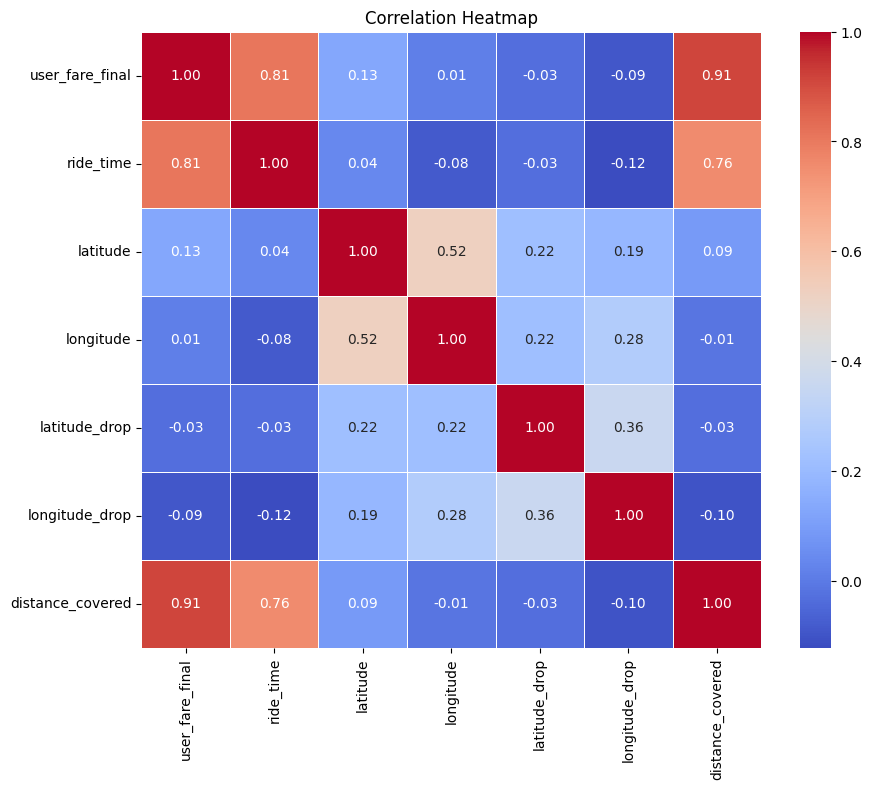

In [278]:

correlation_matrix = pricing.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [280]:
pricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80732 entries, 0 to 80731
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_fare_final   80732 non-null  int64  
 1   ride_time         80732 non-null  int64  
 2   latitude          80732 non-null  float64
 3   longitude         80732 non-null  float64
 4   latitude_drop     80732 non-null  float64
 5   longitude_drop    80732 non-null  float64
 6   distance_covered  80732 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 4.3 MB


In [281]:
import pandas as pd
from math import radians, cos, sin, asin, sqrt

def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance in kilometers between two points
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371  # Radius of earth in kilometers
    return c * r

# Create a new column 'aerial_distance' with the calculated distances
pricing['aerial_distance'] = pricing.apply(lambda row: haversine(row['latitude'], row['longitude'],
                                                                 row['latitude_drop'], row['longitude_drop']), axis=1)

WARNING - (py.warnings._showwarnmsg) - /var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_75017/1516002708.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




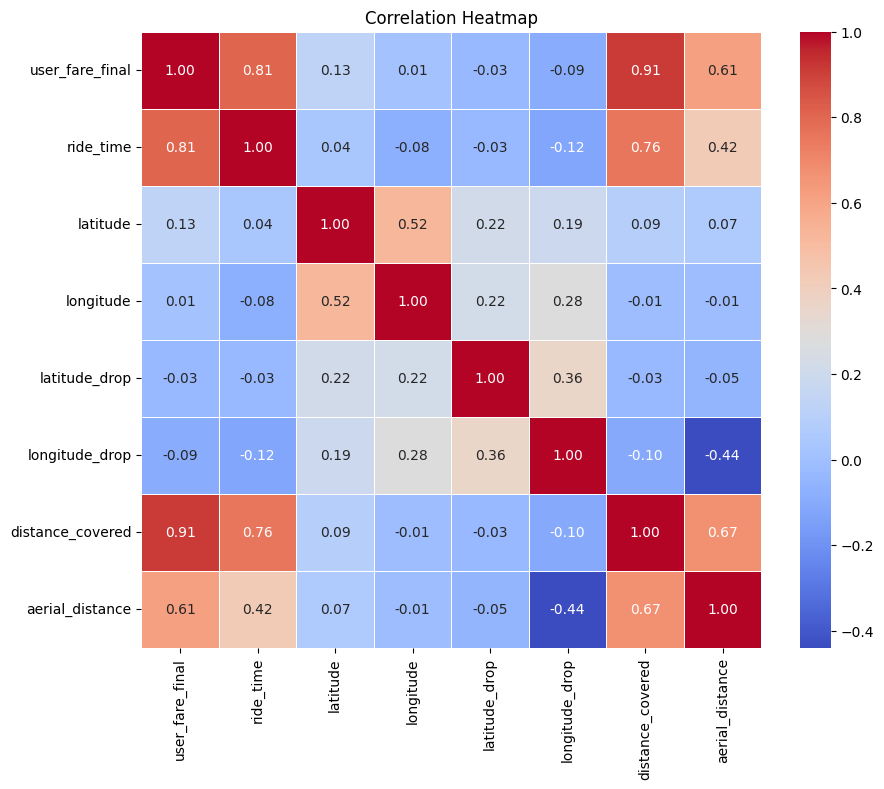

In [282]:
correlation_matrix=pricing.corr()


# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [284]:
pricing[['user_fare_final','ride_time','aerial_distance']].head()

,user_fare_final,ride_time,aerial_distance
0,170,22,3.482064
1,464,36,11.099861
2,184,16,5.173014
3,229,16,5.240277
4,261,20,7.111508


In [315]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load your data into a DataFrame
df=pricing

# Separate the features and target variable
X = df[['ride_time', 'aerial_distance']]
y = df['user_fare_final']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [316]:
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)



Accuracy: 0.7851016029834349


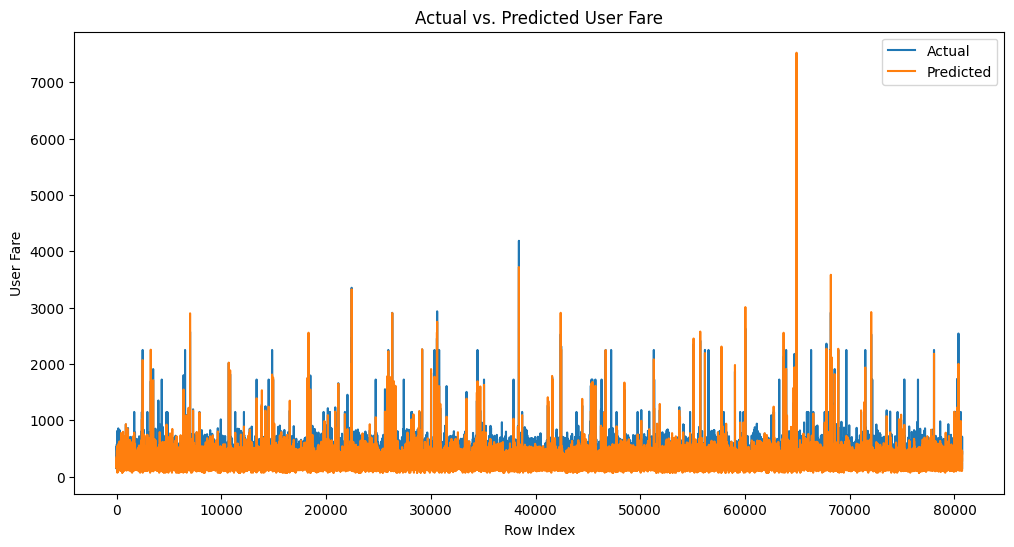

In [317]:
y_pred_all = model.predict(df[['ride_time', 'aerial_distance']])

plt.figure(figsize=(12, 6))
plt.plot(range(len(df)), df['user_fare_final'], label='Actual')
plt.plot(range(len(df)), y_pred_all, label='Predicted')
plt.xlabel('Row Index')
plt.ylabel('User Fare')
plt.title('Actual vs. Predicted User Fare')
plt.legend()
plt.show()

In [328]:
new_data = pd.DataFrame({'ride_time': [30], 'aerial_distance': [8]})

# Make the prediction
predicted_fare = model.predict(new_data)

# Print the predicted fare
print(f"Predicted fare for ride_time=30 and aerial_distance=8: {predicted_fare[0]:.2f}")

Predicted fare for ride_time=30 and aerial_distance=8: 270.14


In [329]:
new_data = pd.DataFrame({'ride_time': [40], 'aerial_distance': [8]})

# Make the prediction
predicted_fare = model.predict(new_data)

# Print the predicted fare
print(f"Predicted fare for ride_time=40 and aerial_distance=8: {predicted_fare[0]:.2f}")

Predicted fare for ride_time=40 and aerial_distance=8: 315.35


In [332]:
new_data = pd.DataFrame({'ride_time': [40], 'aerial_distance': [9]})

# Make the prediction
predicted_fare = model.predict(new_data)

# Print the predicted fare
print(f"Predicted fare for ride_time=50 and aerial_distance=8: {predicted_fare[0]:.2f}")

Predicted fare for ride_time=50 and aerial_distance=8: 323.30


In [336]:
new_data = pd.DataFrame({'ride_time': [11], 'aerial_distance': [2]})

# Make the prediction
predicted_fare = model.predict(new_data)

# Print the predicted fare
print(f"Predicted fare for ride_time=50 and aerial_distance=8: {predicted_fare[0]:.2f}")

Predicted fare for ride_time=50 and aerial_distance=8: 136.58


In [337]:
new_data = pd.DataFrame({'ride_time': [30], 'aerial_distance': [6.67]})

# Make the prediction
predicted_fare = model.predict(new_data)

# Print the predicted fare
print(f"Predicted fare for ride_time=50 and aerial_distance=8: {predicted_fare[0]:.2f}")

Predicted fare for ride_time=50 and aerial_distance=8: 259.58


charges for minute - 4.5
charges for km - 8

In [1]:
model.predict(df[['ride_time', 'aerial_distance']])


NameError: name 'model' is not defined

In [323]:
df[['aerial_distance','distance_covered']].describe()

,aerial_distance,distance_covered
count,80732.000000,80732.000000
mean,6.747802,9.999112
std,5.118875,5.951710
min,0.000000,0.000000
25%,3.840438,5.685000
50%,5.972493,8.757000
75%,8.809285,12.950000
max,935.673116,165.415000


In [319]:
print(y_pred_all.sum())
print(df['user_fare_final'].sum())
print(df['distance_covered'].sum())

20781327.773581892
20775490
807248.328


In [293]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest Regressor': RandomForestRegressor()
}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Evaluate the model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Model: {name}, Mean Squared Error: {mse}")


Model: Linear Regression, Mean Squared Error: 4057.605337403652
Model: Ridge Regression, Mean Squared Error: 4057.6063198099287
Model: Lasso Regression, Mean Squared Error: 4065.2665675090566
Model: Random Forest Regressor, Mean Squared Error: 1911.1154119704004


In [298]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# Load your data into a DataFrame
df = pricing

# Separate the features and target variable
X = df[['ride_time', 'aerial_distance']]
y = df['user_fare_final']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the XGBRegressor model
model = XGBRegressor(objective='reg:squarederror', random_state=42)
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print(f"Model score: {score:.2f}")

Model score: 0.91


In [299]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = model.predict(X_test)

# Calculate RMSE and MAE
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

RMSE: 41.40
MAE: 20.62


In [300]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the parameter grid
params = {
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'reg_lambda': [0.1, 1, 10]
}

# Create the XGBoost regressor
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Set up the Grid Search
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit the Grid Search
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
score = best_model.score(X_test, y_test)
print(f"Best model score: {score:.2f}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best hyperparameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'reg_lambda': 1}
Best model score: 0.92


In [304]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load your data into a DataFrame
df = pricing

X = df[['ride_time', 'aerial_distance']]
y = df['user_fare_final']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_params = {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'reg_lambda': 1}
model = XGBRegressor(objective='reg:squarederror', random_state=42, **best_params)

# Train the model on the training data
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2_score = model.score(X_test, y_test)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R-squared: {r2_score:.2f}")

RMSE: 39.30
MAE: 20.45
R-squared: 0.92


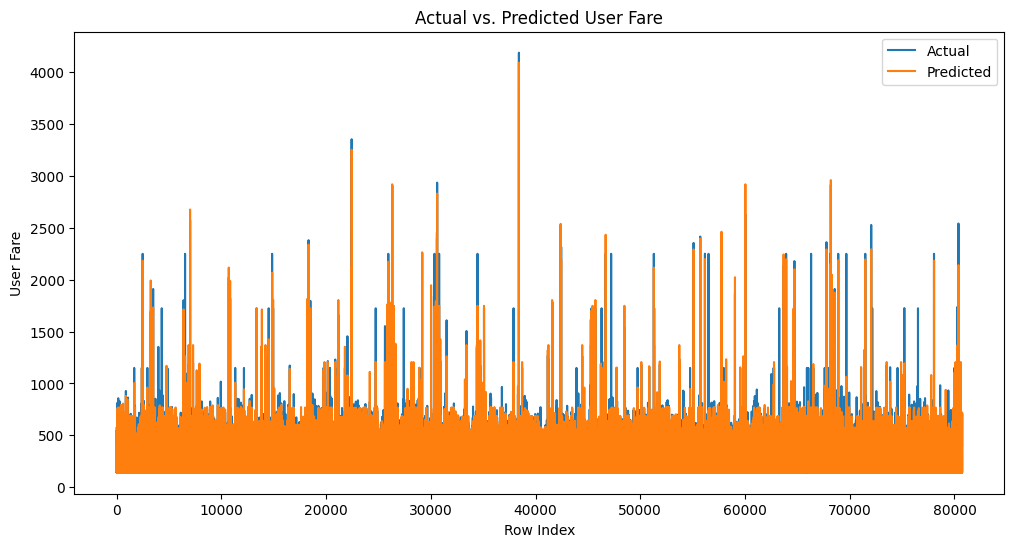

In [305]:
import matplotlib.pyplot as plt

# Make predictions on the entire dataset
y_pred_all = model.predict(df[['ride_time', 'aerial_distance']])

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(range(len(df)), df['user_fare_final'], label='Actual')
plt.plot(range(len(df)), y_pred_all, label='Predicted')
plt.xlabel('Row Index')
plt.ylabel('User Fare')
plt.title('Actual vs. Predicted User Fare')
plt.legend()
plt.show()

In [307]:
y_pred_all.sum()

20774888.0

In [309]:
df['user_fare_final'].sum()

20775490

In [311]:
df['distance_covered'].sum()

807248.328

In [313]:
20775490/807248.328

25.736182137995087

In [312]:
20774888.0/807248.328

25.73543639473478

In [302]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load your data into a DataFrame
df = pricing

X = df[['ride_time', 'distance_covered']]
y = df['user_fare_final']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_params = {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'reg_lambda': 1}
model = XGBRegressor(objective='reg:squarederror', random_state=42, **best_params)

# Train the model on the training data
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2_score = model.score(X_test, y_test)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R-squared: {r2_score}")

RMSE: 43.82
MAE: 25.44
R-squared: 0.8982887237201927


In [303]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your data into a DataFrame
df = pricing

# Separate the features and target variable
X = df[['ride_time', 'distance_covered']]
y = df['user_fare_final']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of models to try
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    XGBRegressor(objective='reg:squarederror', random_state=42)
]

# Train and evaluate each model
for model in models:
    model_name = model.__class__.__name__
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - RMSE: {rmse:.2f}, R-squared: {r2:.2f}")

LinearRegression - RMSE: 48.92, R-squared: 0.87
DecisionTreeRegressor - RMSE: 59.49, R-squared: 0.81
RandomForestRegressor - RMSE: 48.13, R-squared: 0.88
GradientBoostingRegressor - RMSE: 43.22, R-squared: 0.90
XGBRegressor - RMSE: 47.82, R-squared: 0.88
